FIAP - Tecnólogo de Inteligência Artificial


# Machine Learning & Modelling



## Dataset

O dataset mapeia características de pessoas cruzando com o valor pago pelo seu seguro de saúde nos EUA. Os dados são compostos pelas seguintes variáveis: 

- `age` : idade do indivíduo 
- `sex` : sexo do indivíduo 
- `bmi` : "Body mass index", o IMC (índice de massa corporal)
- `children` : número de filhos
- `smoker` : fumante ou não?
- `region` : região de residência da pessoa
- `charges` : tarifa paga pela pessoa

Os dados podem ser lidos diretamente a partir desta URL: https://tinyurl.com/42rvaw4p


## Atividades 

A partir da leitura do dataset, realize as seguintes tarefas: 

### Gerais (CK #2)

1. Faça uma análise descritiva geral dos dados, para se familirizar com o dataset 

### Gráficos (CK #2)

Lembrem-se! Todo gráfico precisa ter um título, o nome do Eixo X e do Eixo Y! Estas alterações nos gráficos são **obrigatórias**. Outras alterações de layout são bem-vindas, e podem gerar nota extra ;D

2. Faça um histograma com as idades das pessoas
3. Faça uma gráfico com a distribuição das pessoas por sexo
4. Faça um boxplot de gastos por região. Cada região deve estar em um boxplot distinto 
5. Faça um gráfico de dispersão (scatter plot) de BMI (eixo X) e Charges (eixo Y). Defina a cor dos pontos pela variável "sex"
6. Faça um pairplot (da biblioteca seaborn) de todas as variáveis. Defina a cor (parâmetro _hue_ ) em função da variável smoker. Observando especialmente os gráficos da linha ou coluna das tarifas (charges), quais são suas principais conclusões? 


### Filtros de dataframes (CK #3)

7. Faça um dataframe menor selecionamento apenas selecionando as pessoas que pagam acima do valor médio da tarifa. Descreva o perfil destas pessoas em termos de suas variáveis: ou seja, possuem quantos filhos? qual a idade média? são geralmente os homens ou as mulheres? etc. 
8. Verifique quantas pessoas existem abaixo dos 30 anos E que são fumantes


### Regressão linear (CK #3)

9. Padronize as features do dataset 
10. Execute uma regressão linear simples usando todas as features (o label é o valor pago do seguro). Calcule o `R2 score` e interprete o valor desta métrica

# Checkpoint 2

## Importar recursos

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

## Ler data set

In [77]:
dados = pd.read_csv("https://tinyurl.com/42rvaw4p")

## Verificar, analisar e tratar o data set

In [78]:
display(dados)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [79]:
dados.sample(5)

,age,sex,bmi,children,smoker,region,charges
134,20,female,28.785,0,no,northeast,2457.21115
1058,24,female,39.490,0,no,southeast,2480.97910
979,36,female,29.920,0,no,southeast,4889.03680
12,23,male,34.400,0,no,southwest,1826.84300
54,40,female,28.690,3,no,northwest,8059.67910


In [80]:
dados.shape

(1338, 7)

In [81]:
dados.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [82]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [83]:
dados.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [84]:
dados.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [85]:
dados.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [86]:
dados.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [87]:
sex = lambda x: 0 if (x == "male") else 1

dados["sex"] = dados["sex"].apply(sex)

# 0 para male
# 1 para female

In [88]:
smoker = lambda y: 0 if (y == "yes") else 1

dados["smoker"] = dados["smoker"].apply(smoker)

# 0 para fumante
# 1 para nao fumante

In [89]:
display(dados)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,southwest,16884.92400
1,18,0,33.770,1,1,southeast,1725.55230
2,28,0,33.000,3,1,southeast,4449.46200
3,33,0,22.705,0,1,northwest,21984.47061
4,32,0,28.880,0,1,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,northwest,10600.54830
1334,18,1,31.920,0,1,northeast,2205.98080
1335,18,1,36.850,0,1,southeast,1629.83350
1336,21,1,25.800,0,1,southwest,2007.94500


In [90]:
dados.isnull().value_counts()

age    sex    bmi    children  smoker  region  charges
False  False  False  False     False   False   False      1338
dtype: int64

## Vizualizando os dados

<AxesSubplot:>

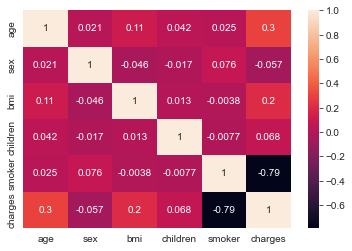

In [91]:
# Matriz de correlação (Quando mais proximo de 1, maior a correlação entre as variáveis)
# Podemos notar uma relacao acima da media entre charges e age

sns.heatmap(dados.corr(), annot = True)

## Histograma com idade das pessoas

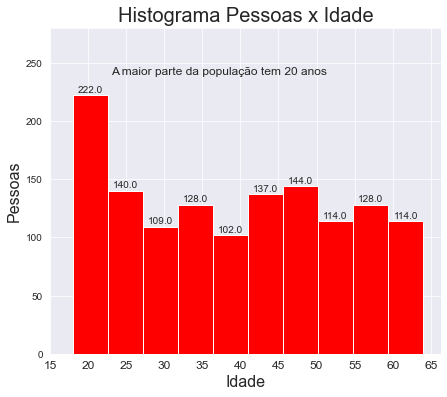

In [92]:
idade = dados["age"]

plt.figure(figsize=(7,6))
ax = idade.plot(kind = "hist", rot = 0, color = "r")

ax.set_title("Histograma Pessoas x Idade", y = 1, fontsize = 20)
ax.set_xlabel("Idade", fontsize = 16)
ax.set_ylabel("Pessoas", fontsize = 16)

ax.set_xticks([i for i in range(15, 70, 5)])
ax.tick_params(axis = "x", labelsize = 12)
ax.set_ylim(0, 280)
ax.tick_params(axis = "y", labelsize = 10)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords = "offset points", ha="center", va = "bottom")

ax.text(x = 23, y = 240, s = "A maior parte da população tem 20 anos",
       fontsize = 12)    

plt.show()


## Grafico com a distribuicao das pessoas por sexo

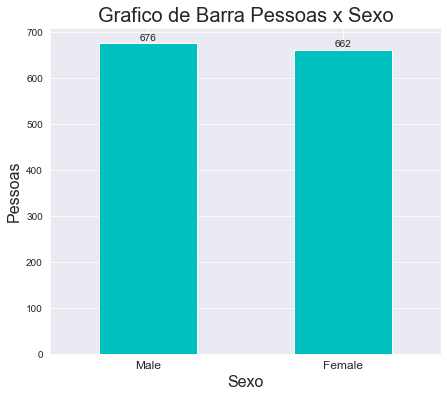

In [93]:
gender = dados["sex"].value_counts()
plt.figure(figsize = (7, 6))
ax = gender.plot(kind = "bar", rot = 0, color = "c")
ax.set_title("Grafico de Barra Pessoas x Sexo", y = 1, fontsize=20)
ax.set_xlabel("Sexo", fontsize = 16)
ax.set_ylabel("Pessoas", fontsize = 16)
ax.set_xticklabels(("Male", "Female"), fontsize = 12)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords = "offset points", ha = "center", va = "bottom")

plt.show()

## Boxplot de gastos - charges - por regiao, cada regiao deve estar em um boxplot distinto

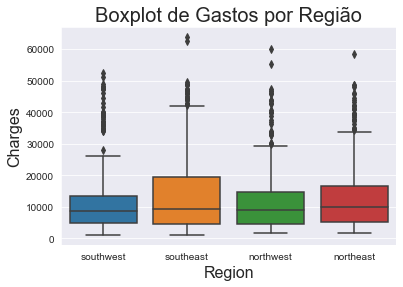

In [94]:
sns.boxplot(data = dados, x = "region", y = "charges")

plt.title("Boxplot de Gastos por Região", fontsize = 20)
plt.xlabel("Region", fontsize = 16)
plt.ylabel("Charges", fontsize = 16)

plt.show()

## Grafico de dispersao (scatter plot) de BMI (eixo X) e Charges (eixo y). Definir cor dos pontos pela variavel sex

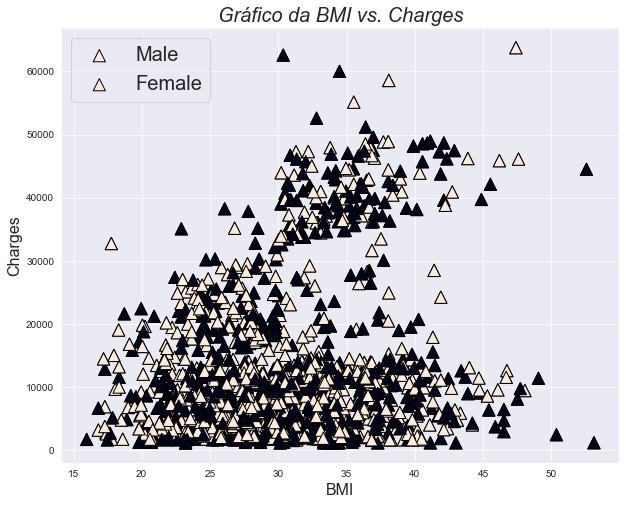

In [95]:
fig, ax = plt.subplots(figsize=(10, 8))

for label in ["Male", "Female"]:
    if label == "Male":
        color = "k"
    else:
        color = "r"

    sex = dados["sex"]
    ax.scatter(x=dados["bmi"], y=dados["charges"], c = sex, s=150, marker="^", edgecolors="k", label=label)
    
ax.set_title("Gráfico da BMI vs. Charges", 
             fontsize=20, fontstyle="italic")

ax.set_xlabel("BMI", fontsize=16)
ax.set_ylabel("Charges", fontsize=16)
ax.grid(True)
ax.legend(loc="upper left", fontsize=20)

plt.show()

## Pairplot (biblioteca SeaBorn) de todas variaveis, definir cor parametro hue em funçao da variavel smoker

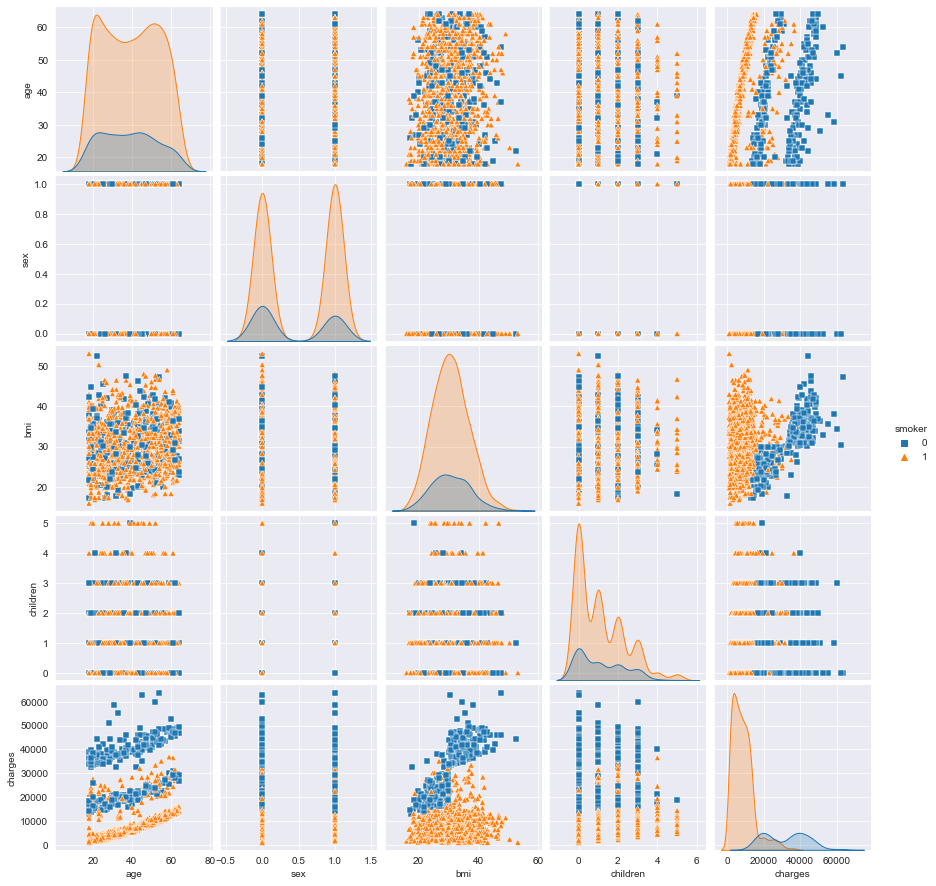

In [96]:
sns.set_style("darkgrid")

graficoPairplot = sns.pairplot(dados, hue = "smoker", markers=["s", "^"])

plt.show()

In [97]:
dados.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region       object
charges     float64
dtype: object

## Observando especialmente os gráficos da linha ou coluna das tarifas (charges), quais são suas principais conclusões?

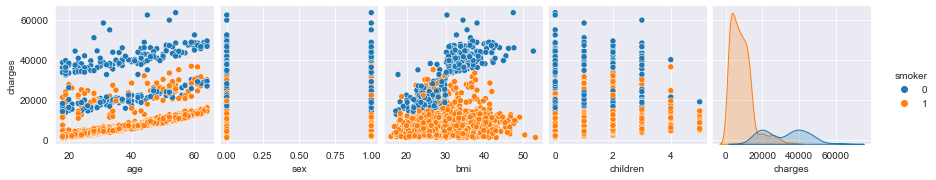

In [98]:
# 0 para fumante
# 1 para nao fumante

sns.set_style("darkgrid")

graficoPairplot = sns.pairplot(dados, hue = "smoker", y_vars=["charges"], x_vars=["age", "sex", "bmi", "children", "charges"])

#### Analisando os graficos, é possivel concluir que para a idade de 20 a 60 anos, fumantes gastam mais de 40000, a maioria é homem, tem um BMI acima de 20 e possuem de 0 a 5 filhos.

# Checkpoint 3

7. Faça um dataframe menor selecionamento apenas selecionando as pessoas que pagam acima do valor médio da tarifa. Descreva o perfil destas pessoas em termos de suas variáveis: ou seja, possuem quantos filhos? qual a idade média? são geralmente os homens ou as mulheres? etc. 
8. Verifique quantas pessoas existem abaixo dos 30 anos E que são fumantes
9. Padronize as features do dataset 
10. Execute uma regressão linear simples usando todas as features (o label é o valor pago do seguro). Calcule o `R2 score` e interprete o valor desta métrica

## Filtro de pessoas que pagam acima do valor medio da tarifa

In [99]:
media = dados["charges"].mean()
filtro = dados[dados["charges"] > media]
filtro

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,southwest,16884.92400
3,33,0,22.705,0,1,northwest,21984.47061
9,60,1,25.840,0,1,northwest,28923.13692
11,62,1,26.290,0,0,southeast,27808.72510
14,27,0,42.130,0,0,southeast,39611.75770
...,...,...,...,...,...,...,...
1318,35,0,39.710,4,1,northeast,19496.71917
1321,62,0,26.695,0,0,northeast,28101.33305
1323,42,1,40.370,2,0,southeast,43896.37630
1328,23,1,24.225,2,1,northeast,22395.74424


## Descreva o perfil destas pessoas em termos de suas variáveis: ou seja, possuem quantos filhos? 
## Qual a idade média? são geralmente os homens ou as mulheres?

In [100]:
round(dados["children"].mean())

1

In [101]:
round(dados["age"].mean())

39

## Verificar quantas pessoas existem abaixo dos 30 anos e que sao fumantes

In [102]:
# 0 para fumante
# 1 para nao fumante

filtroIdadeFumante = dados[(dados["age"] < 30) & (dados["smoker"] == 0)]
filtroIdadeFumante.value_counts()

age  sex  bmi    children  smoker  region     charges    
18   0    17.29  2         0       northeast  12829.45510    1
24   0    28.50  0         0       northeast  35147.52848    1
25   0    33.33  2         0       southeast  36124.57370    1
          29.70  3         0       southwest  19933.45800    1
          24.13  0         0       northwest  15817.98570    1
                                                            ..
19   1    32.49  0         0       northwest  36898.73308    1
          30.02  0         0       northwest  33307.55080    1
          28.88  0         0       northwest  17748.50620    1
          28.31  0         0       northwest  17468.98390    1
29   1    27.94  1         0       southeast  19107.77960    1
Length: 86, dtype: int64

## Padronizar features do dataset - aplicar regressao linear 

### Importando sklearn 

In [103]:
from sklearn.preprocessing import StandardScaler as ss
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

### Definindo algumas funçoes uteis

In [104]:
def metrics(x, y):
    print("-" * 30)
    print("Metricas")
    print("-" * 30)
    
    print(f"R2 Score: {round(r2_score(x, y), 2)}")
    print(f"MSE: { round(mse(x, y), 2)}")
    print(f"MAE: { round(mae(x, y), 2)}")
    
    print("-" * 30)

In [113]:
def plot(x, y, df):
    plt.figure(figsize = (10, 7))
    ax = sns.regplot(x = x, y = y, marker = "^", data = df)
    plt.title("Grafico de Predição vs Real", fontsize = 20)
    plt.xlabel(x, fontsize = 17)
    plt.ylabel(y, fontsize = 17)
    plt.show()


### Separando dados e labels

In [105]:
X = dados.drop(columns = ["charges", "region"])
y = dados["charges"] ### label = charges

x_train, x_test, y_train, y_test = tts(X, y,
                                       test_size = 0.2,
                                       random_state = 1)

### Padronizando dados

In [106]:
scaler = ss()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Regressão Linear - sem dados padronizados

In [107]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)

metrics(y_test, y_pred)

------------------------------
Metricas
------------------------------
R2 Score: 0.76
MSE: 35699244.58
MAE: 4037.95
------------------------------


### Regressão Linear - com dados padronizados

In [108]:
regressor = LinearRegression() #LinearRegressor
regressor.fit(x_train_scaled, y_train)

y_pred = regressor.predict(x_test_scaled)

metrics(y_test, y_pred)

------------------------------
Metricas
------------------------------
R2 Score: 0.76
MSE: 35699244.58
MAE: 4037.95
------------------------------


### Metricas

------------------------------
PREVISÕES
------------------------------


,Actual,Predicted
559,1646.4297,4100.432826
1087,11353.2276,12693.042612
1020,8798.5930,12808.938260
460,10381.4787,13634.431049
802,2103.0800,989.141063


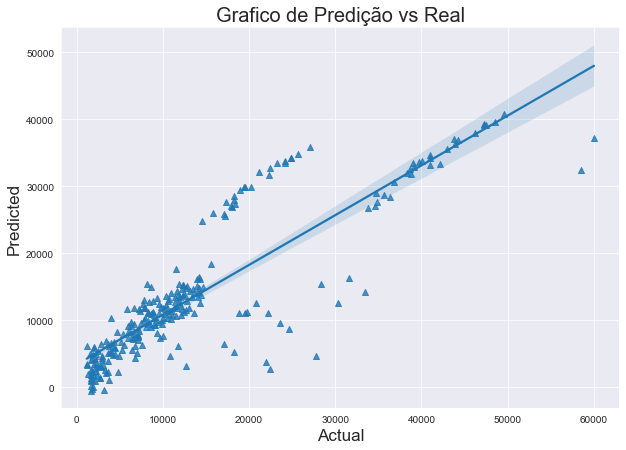

In [114]:
print("-" * 30)
print("PREVISÕES")
print("-" * 30)

df_temp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
display(df_temp.head(5))

plot("Actual", "Predicted", df = df_temp)

#### Calcular R2 Score

In [110]:
print("-" * 30)
print("R2 SCORE")
print("-" * 30)

metrica = round(r2_score(y_test, y_pred), 2)
print(f"{metrica} %")

------------------------------
R2 SCORE
------------------------------
0.76 %


In [111]:
metrics(y_test, y_pred)

------------------------------
Metricas
------------------------------
R2 Score: 0.76
MSE: 35699244.58
MAE: 4037.95
------------------------------
